In [9]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

## Load Dataset

In [10]:
titanic_data=pd.read_csv('titanic.csv')

In [11]:
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [12]:
titanic_data.index

RangeIndex(start=0, stop=891, step=1)

In [13]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [14]:
#total number of passengers
print("total number of passenger="+str(len(titanic_data.index)))

total number of passenger=891


## data analysis

<Axes: xlabel='Survived', ylabel='count'>

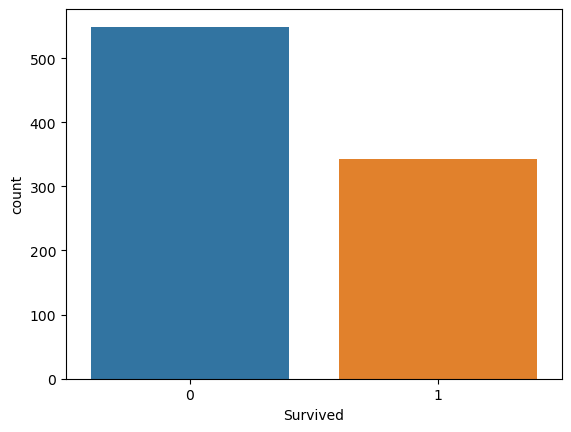

In [15]:
sns.countplot(x='Survived',data=titanic_data) #bar graph

<Axes: xlabel='Survived', ylabel='count'>

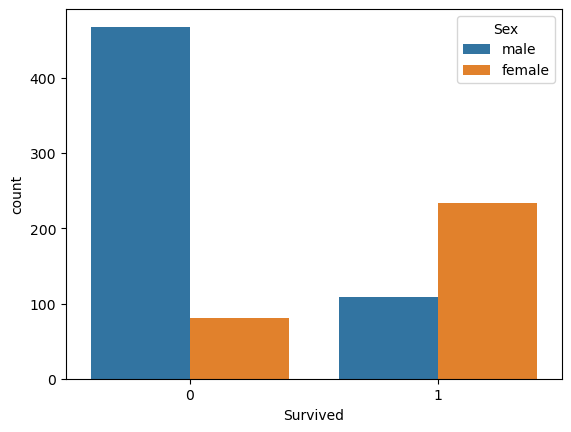

In [16]:
sns.countplot(x='Survived',hue='Sex',data=titanic_data)

In [82]:
sns.countplot(x='Survived',hue='Pclass',data=titanic_data) #konsi class k log survived kra ha

ValueError: Could not interpret input 'Survived'

<Axes: ylabel='Frequency'>

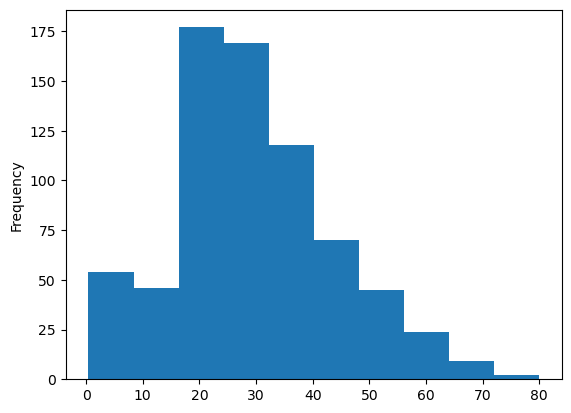

In [17]:
titanic_data['Age'].plot.hist() #histogram People who survived

<Axes: ylabel='Frequency'>

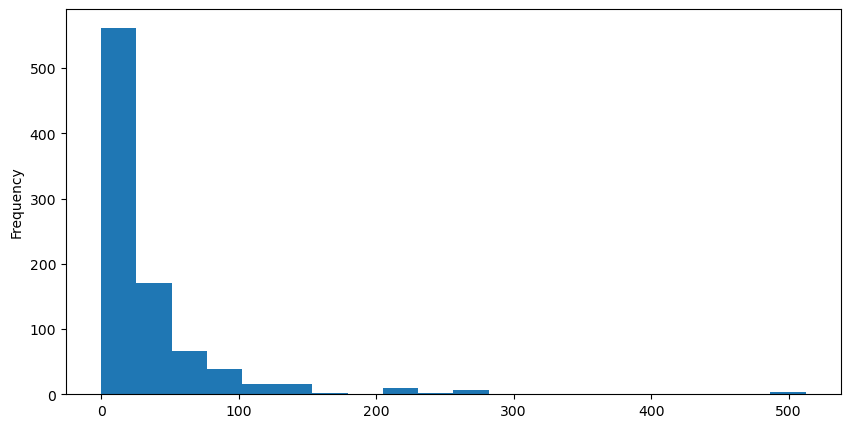

In [18]:
titanic_data['Fare'].plot.hist(bins=20,figsize=(10,5))

In [19]:
titanic_data.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

<Axes: xlabel='SibSp', ylabel='count'>

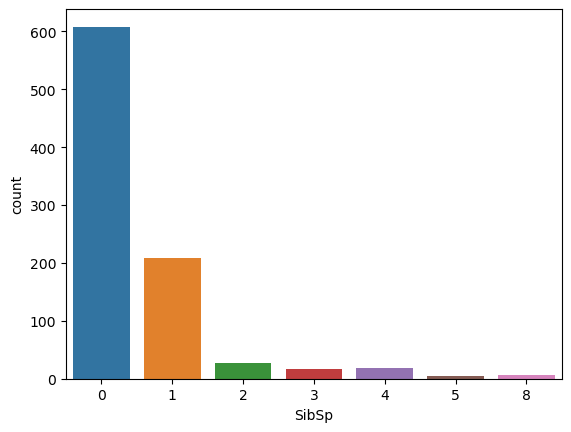

In [20]:
sns.countplot(x='SibSp',data=titanic_data)

## Data wrangling/Data cleaning

In [21]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [22]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

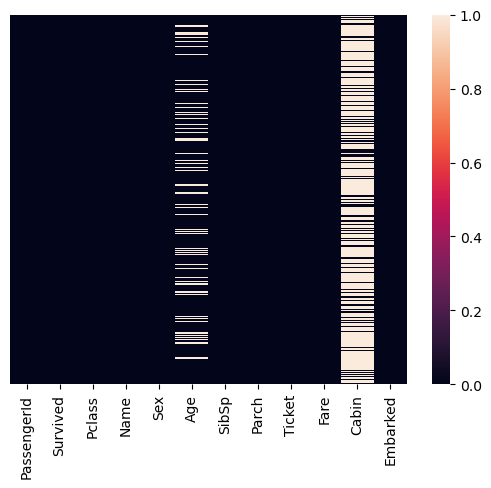

In [23]:
s=sns.heatmap(titanic_data.isnull(),yticklabels=False) #null values

<Axes: xlabel='Pclass', ylabel='Age'>

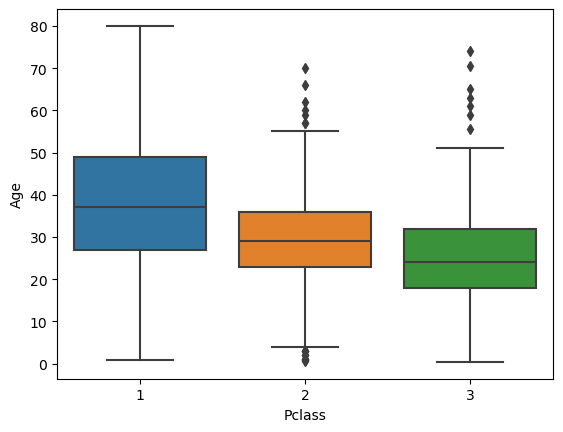

In [24]:
sns.boxplot(x='Pclass',y='Age',data=titanic_data) #first and second class have more people as compared to 3rd Class

In [25]:
# find the percentage of null value in age columns
(titanic_data['Age'].isnull().sum()/len(titanic_data['Age']))*100

19.865319865319865

In [26]:
# find the percentage of null value in Cabin columns
(titanic_data['Cabin'].isnull().sum()/len(titanic_data['Cabin']))*100

77.10437710437711

In [27]:
#categorical data set applying logistic regression
titanic_data.head(5) 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [28]:
# fill age column

In [29]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

<Axes: >

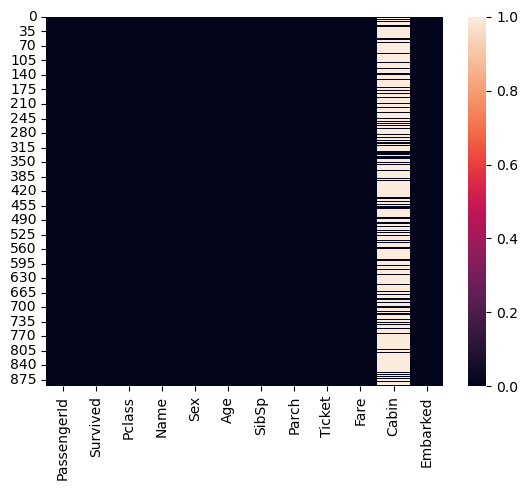

In [30]:
sns.heatmap(titanic_data.isna())

In [31]:
# drop Canbin column
titanic_data.drop('Cabin', axis=1, inplace=True)

In [32]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


<Axes: >

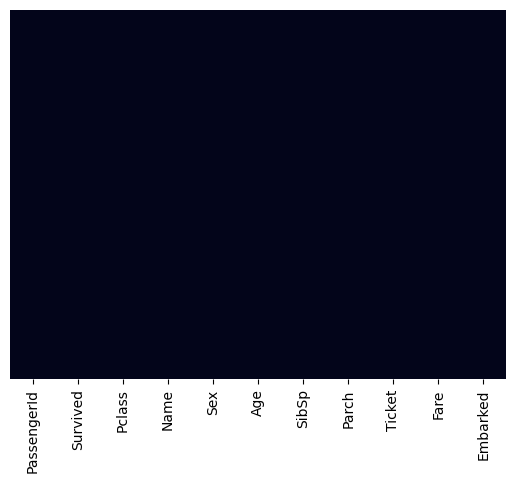

In [33]:
sns.heatmap(titanic_data.isnull(),yticklabels=False,cbar=False) #all null values removed

In [34]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [35]:
titanic_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [36]:
pd.get_dummies(titanic_data['Sex'])

,female,male
0,False,True
1,True,False
2,True,False
3,True,False
4,False,True
...,...,...
886,False,True
887,True,False
888,True,False
889,False,True


In [37]:
sex=pd.get_dummies(titanic_data['Sex'],drop_first=True) 
sex.head(4)

,male
0,True
1,False
2,False
3,False


In [38]:
titanic_data['Gender'] = sex

In [39]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Gender
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True


In [40]:
titanic_data.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [41]:
titanic_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.0,1,0,7.2500,True
1,2,1,1,38.0,1,0,71.2833,False
2,3,1,3,26.0,0,0,7.9250,False
3,4,1,1,35.0,1,0,53.1000,False
4,5,0,3,35.0,0,0,8.0500,True


In [42]:
titanic_data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Gender
0,1,0,3,22.000000,1,0,7.2500,True
1,2,1,1,38.000000,1,0,71.2833,False
2,3,1,3,26.000000,0,0,7.9250,False
3,4,1,1,35.000000,1,0,53.1000,False
4,5,0,3,35.000000,0,0,8.0500,True
...,...,...,...,...,...,...,...,...
886,887,0,2,27.000000,0,0,13.0000,True
887,888,1,1,19.000000,0,0,30.0000,False
888,889,0,3,29.699118,1,2,23.4500,False
889,890,1,1,26.000000,0,0,30.0000,True


In [43]:
titanic_data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Age            0
SibSp          0
Parch          0
Fare           0
Gender         0
dtype: int64

## Train data

In [44]:
x=titanic_data.drop('Survived',axis=1)
y=titanic_data['Survived']

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=42)

In [47]:
from sklearn.linear_model import LogisticRegression

In [48]:
logmodel=LogisticRegression()

In [49]:
logmodel.fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
predictions=logmodel.predict(x_test)

In [51]:
from sklearn.metrics import classification_report

In [52]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.80      0.86      0.83       175\n           1       0.77      0.68      0.73       120\n\n    accuracy                           0.79       295\n   macro avg       0.79      0.77      0.78       295\nweighted avg       0.79      0.79      0.79       295\n'

In [53]:
from sklearn.metrics import confusion_matrix

In [54]:
confusion_matrix(y_test,predictions)

array([[151,  24],
       [ 38,  82]], dtype=int64)

In [55]:
from sklearn.metrics import accuracy_score 

## Model Accuracy

In [57]:
accuracy_score(y_test,predictions)*100

78.98305084745762